In [18]:
import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from PIL import Image
from wordcloud import ImageColorGenerator

In [53]:
reddit_df = pd.read_csv('/Users/jenniferwu/Documents/SVD_for_Subreddit_Recommendation/reddit_praw.csv')
reddit_df.drop(columns=['Unnamed: 0'], inplace=True)

In [33]:
bag = reddit_df.groupby(['subreddit'], as_index=False).agg({'utc':'count'})

In [55]:
char_mask = np.array(Image.open("/Users/jenniferwu/Downloads/on_color_large.png"))


def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_mask = np.ndarray((char_mask.shape[0],char_mask.shape[1]), np.int32)

for i in range(len(char_mask)):
    transformed_mask[i] = list(map(transform_format, char_mask[i]))

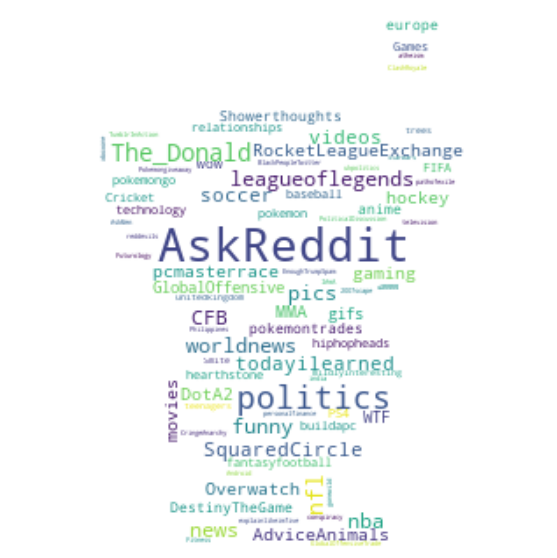

In [57]:
d = {}
for a, x in bag.values:
    d[a] = x

wordcloud = WordCloud(background_color="white", max_words=200, mask=transformed_mask)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
plt.savefig("/Users/jenniferwu/Documents/SVD_for_Subreddit_Recommendation/redditbotwc.png", format="png")

<Figure size 432x288 with 0 Axes>